<a href="https://colab.research.google.com/github/edimarasantos/atividade-colab/blob/main/Processamento_Imagens_atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from matplotlib import pyplot as plt

image_path = "/content/drive/My Drive/Colab Notebooks/PI/imagens/"

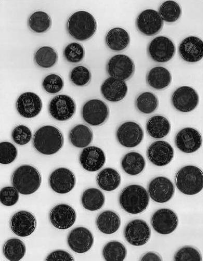

In [ ]:
image = cv.cvtColor(io.imread(image_path + "coins.jpg"), cv.COLOR_RGBA2GRAY)

cv2_imshow(cv.resize(image, None, fx=.52, fy=.52))

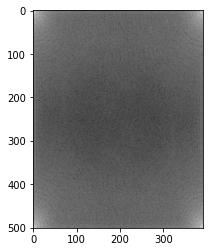

In [ ]:
### Transformada de Fourier

image_fft = np.fft.fft2(image)

# plt.imshow(np.abs(image_fft), cmap="gray")
plt.imshow(np.log(1+np.abs(image_fft)), cmap="gray")
plt.show()

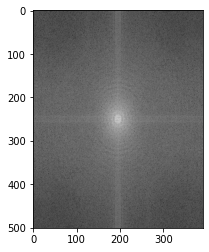

In [ ]:
### Shift

image_fft_shift = np.fft.fftshift(image_fft)

plt.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
plt.show()

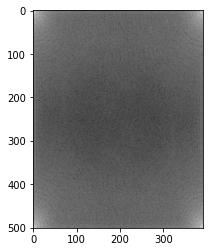

In [ ]:
### Shift inverso

image_fft_shift_inverso = np.fft.ifftshift(image_fft_shift)

plt.imshow(np.log(1+np.abs(image_fft_shift_inverso)), cmap="gray")
plt.show()

# Filtro passa-alta ideal

In [ ]:
### Distancia Euclidiana

def distance(point_1,point_2):
    from math import sqrt
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)

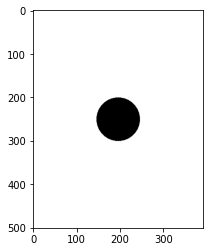

In [ ]:
def passa_baixa_ideal(D_0, imageShape):
    base = np.zeros(imageShape[:2])
    rows, cols = imageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D_0:
                base[y,x] = 1
    return base

### Filtro passa alta ideal
def passa_alta_ideal(D_0, imageShape):
    base = 1 - passa_baixa_ideal(D_0, imageShape)

    return base

LowHigh = passa_alta_ideal(50, image.shape)
plt.imshow(np.abs(LowHigh), "gray")
plt.show()

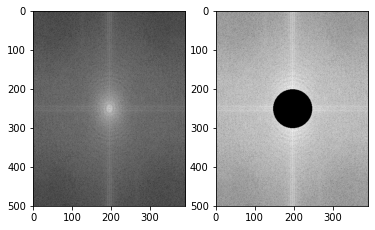

In [ ]:
LowHighCenter = image_fft_shift * LowHigh

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHighCenter)), cmap="gray")

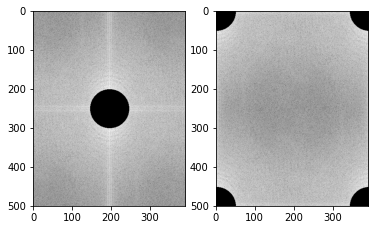

In [ ]:
LowHigh_shift_inverse = np.fft.ifftshift(LowHighCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowHighCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHigh_shift_inverse)), cmap="gray")

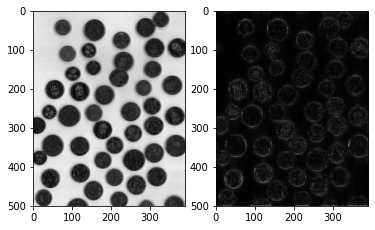

In [ ]:
inverse_LowHigh = np.fft.ifft2(LowHigh_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowHigh), cmap="gray")

# Filtro passa-alta Butterworth

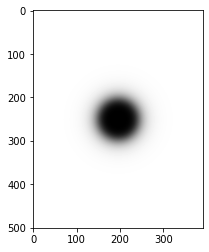

In [ ]:
def passa_baixa_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D_0)**(2*n))
    return base
    
### Filtro passa alta Butterworth
def passa_alta_butterworth(D_0, imgageShape, n):
    base = 1 - passa_baixa_butterworth(D_0, imgageShape, n)

    return base

LowHigh_BW = passa_alta_butterworth(50, image.shape, 3)
plt.imshow(np.abs(LowHigh_BW), "gray")
plt.show()

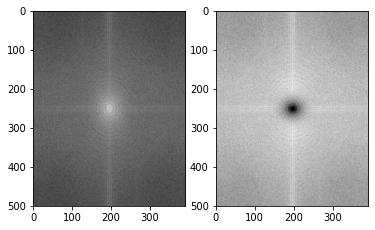

In [ ]:
LowHigh_BW_Center = image_fft_shift * LowHigh_BW

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHigh_BW_Center)), cmap="gray")

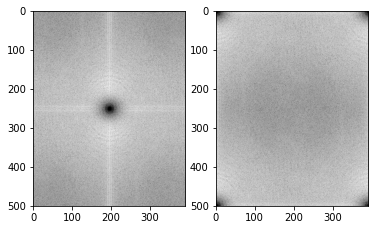

In [ ]:
LowHigh_BW_shift_inverse = np.fft.ifftshift(LowHigh_BW_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowHigh_BW_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHigh_BW_shift_inverse)), cmap="gray")

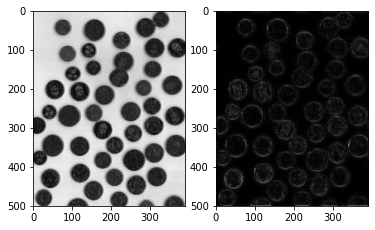

In [ ]:
inverse_LowHigh_BW = np.fft.ifft2(LowHigh_BW_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowHigh_BW), cmap="gray")

# Filtro passa-baixa Gaussiano

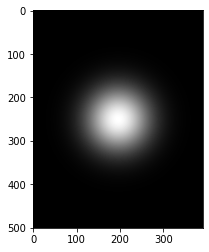

In [ ]:
### Filtro passa-baixa Gaussiano

def passa_baixa_gaussian(d0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2), (cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = np.exp(-(distance((y, x), center)**2) / (2 * d0 **2))
    return base

LowPass_Gaussian = passa_baixa_gaussian(50, image.shape)
plt.imshow(np.abs(LowPass_Gaussian), "gray")
plt.show()

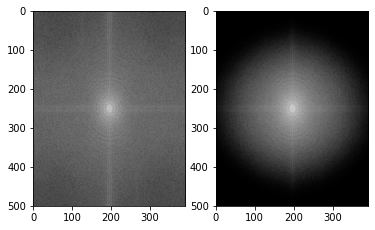

In [ ]:
LowPassCenter_Gaussian = image_fft_shift * LowPass_Gaussian

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassCenter_Gaussian)), cmap="gray")

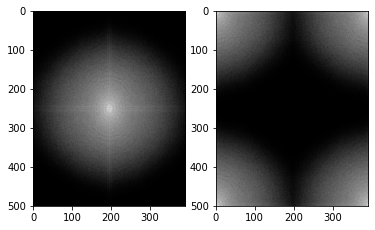

In [ ]:
LowPass_shift_inverse_Gaussian = np.fft.ifftshift(LowPassCenter_Gaussian)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassCenter_Gaussian)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_shift_inverse_Gaussian)), cmap="gray")

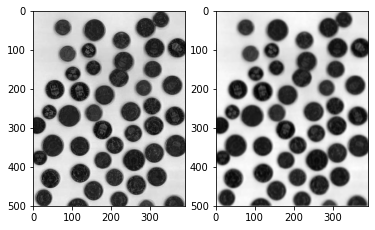

In [ ]:
inverse_LowPass_Gaussian = np.fft.ifft2(LowPass_shift_inverse_Gaussian)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass_Gaussian), cmap="gray")

# Filtro passa-alta Gaussiano

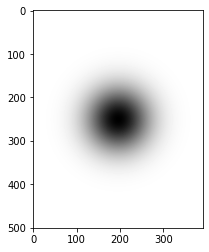

In [ ]:
### Filtro passa-alta Gaussiano

def passa_alta_gaussian(d0, imgShape):
    base = 1 - passa_baixa_gaussian(d0, imgShape)

    return base

LowHigh_Gaussian = passa_alta_gaussian(50, image.shape)
plt.imshow(np.abs(LowHigh_Gaussian), "gray")
plt.show()

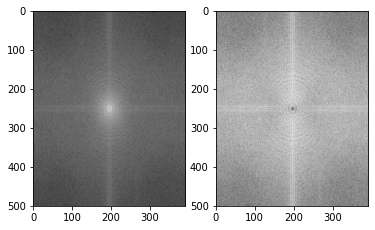

In [ ]:
LowHighCenter_Gaussian = image_fft_shift * LowHigh_Gaussian

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHighCenter_Gaussian)), cmap="gray")


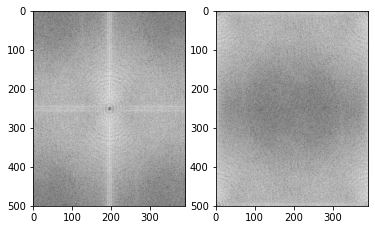

In [ ]:
LowHigh_shift_inverse_Gaussian = np.fft.ifftshift(LowHighCenter_Gaussian)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowHighCenter_Gaussian)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowHigh_shift_inverse_Gaussian)), cmap="gray")

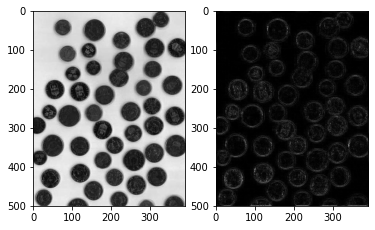

In [ ]:
inverse_LowHigh_Gaussian = np.fft.ifft2(LowHigh_shift_inverse_Gaussian)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowHigh_Gaussian), cmap="gray")

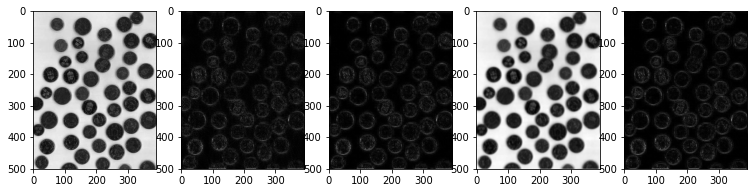

In [ ]:
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(np.abs(inverse_LowHigh), cmap="gray")
ax2 = fig.add_subplot(1,5,3)
ax2.imshow(np.abs(inverse_LowHigh_BW), cmap="gray")
ax2 = fig.add_subplot(1,5,4)
ax2.imshow(np.abs(inverse_LowPass_Gaussian), cmap="gray")
ax2 = fig.add_subplot(1,5,5)
ax2.imshow(np.abs(inverse_LowHigh_Gaussian), cmap="gray")
